In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB # For Multinomial Naive Bayes Model
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.naive_bayes import BernoulliNB 
import warnings
warnings.filterwarnings('ignore')

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [11]:
print(train.head())
print(test.head())

   id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       

In [12]:
print(train.shape)
print(test.shape)

(900000, 33)
(700000, 32)


In [13]:
del train['id']
del train['f_27']

# del test['id']
del test['f_27']

In [14]:
# Separating Target & Other Columns
X = train.drop(columns=['target'])
y = train['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(630000, 30)
(270000, 30)
(630000,)
(270000,)


In [17]:
bnbTesting = BernoulliNB() #Classifier
bnbTesting.fit(X_train, y_train) #Training by fitting into model
bnbTestingPred = bnbTesting.predict(X_test) #Prediction
bnbAcc = metrics.accuracy_score(y_test, bnbTestingPred) #Checking Accuracy Score
print ("Naive Bayes Accuracy: ", bnbAcc)

Naive Bayes Accuracy:  0.5810888888888889


In [18]:
# ======== NAIVE BAYES ======== 
nav_clf = BernoulliNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean = nav_scores.mean()
print('Naive Bayes Mean Score: ',nav_mean)

Naive Bayes Scores:  [0.58599048 0.58252381 0.58387619 0.58149524 0.5831619  0.58197143]
Naive Bayes Mean Score:  0.5831698412698412


In [19]:
# ======== NAIVE BAYES (LAPLACE SMOOTHING) ======== 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

gnbAcc = metrics.accuracy_score(y_test, y_pred) # Checking Accuracy Score
print ("Naive Bayes Accuracy: ", gnbAcc)

Naive Bayes Accuracy:  0.6253814814814814


In [20]:
# ======== NAIVE BAYES ======== 
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean = nav_scores.mean()
print('Naive Bayes Mean Score: ',nav_mean)

Naive Bayes Scores:  [0.62624762 0.62592381 0.62628571 0.62492381 0.62640952 0.62606667]
Naive Bayes Mean Score:  0.6259761904761906


In [21]:
print(train.shape)
print(test.shape)

(900000, 31)
(700000, 31)


In [22]:
zainCSVtoTest = test[['id']]

In [23]:
zainCSVtoTest

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [24]:
predT = test.drop(columns=['id'])

In [25]:
predT.head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0


In [26]:
predictionOnTest = classifier.predict(predT)

In [27]:
print(predictionOnTest)
print(len(predictionOnTest))

[0 1 1 ... 0 0 0]
700000


In [28]:
zainCSVtoTest['target'] = predictionOnTest

In [29]:
zainCSVtoTest.head()

,id,target
0,900000,0
1,900001,1
2,900002,1
3,900003,0
4,900004,0


In [30]:
zainCSVtoTest.shape

(700000, 2)

In [31]:
zainCSVtoTest.to_csv('zainCSVtoTest.csv', index=False)

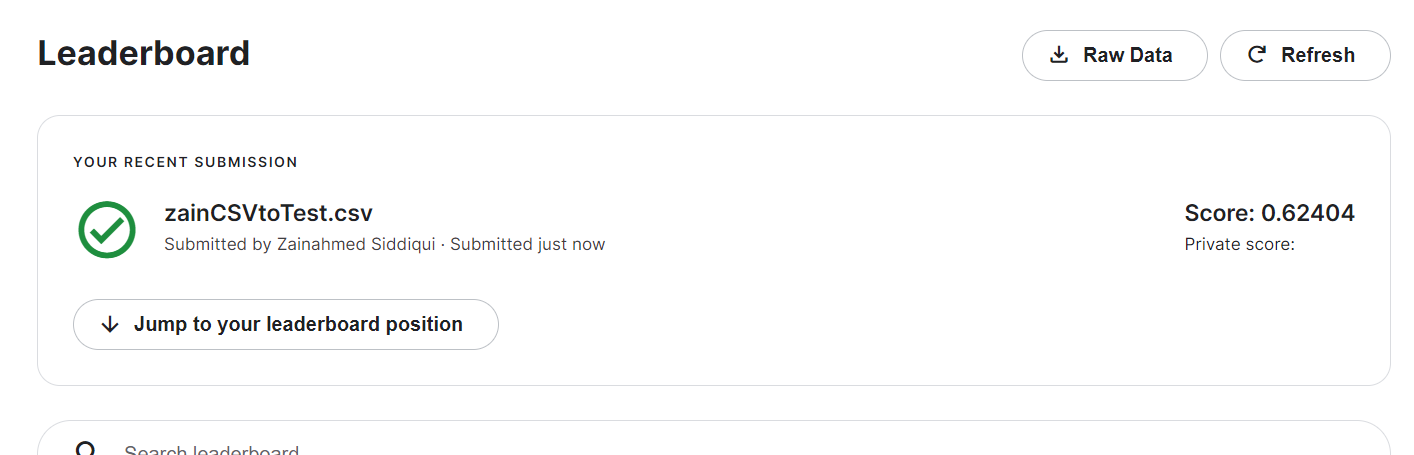

## Paramter Tuning

In [32]:
import numpy as np

In [33]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [34]:
# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [35]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=10, verbose=10)
bernoulli_nb_grid.fit(X,y)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Train Accuracy : 0.583
Test Accuracy : 0.581
Best Accuracy Through Grid Search : 0.583
Best Parameters :  {'alpha': 10.0}


In [36]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV
# nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
# nbModel_grid.fit(X_train, y_train)
# print(nbModel_grid.best_estimator_)
# ...
# Fitting 10 folds for each of 100 candidates, totalling 1000 fits
# GaussianNB(priors=None, var_smoothing=1.0)

In [37]:
GaussianNB(priors=None, var_smoothing=1.0)

GaussianNB(var_smoothing=1.0)

In [38]:
bnbTesting = BernoulliNB(alpha=10.0) #Classifier
bnbTesting.fit(X_train, y_train) #Training by fitting into model
bnbTestingPred = bnbTesting.predict(X_test) #Prediction
bnbAcc = metrics.accuracy_score(y_test, bnbTestingPred) #Checking Accuracy Score
print ("Naive Bayes Accuracy: ", bnbAcc)

Naive Bayes Accuracy:  0.5811
